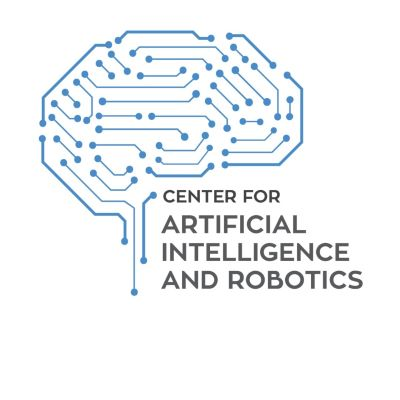

# Logistic Regression Project 

<div style="direction:rtl">
خب، خب، در این پروژه قصد داریم با کار روی دیتاست یک شرکت تبلیغاتی، این که کاربر روی تبلیغی که به او نمایش داده شده کلیک می کند یا خیر را پیش بینی کنیم.

## Import Libraries

<div style="direction:rtl">
کتابخانه های مورد نیاز را ایمپورت کنید.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

<div style="direction:rtl">
دیتاست مورد نظر را فرخوانی کنید و نگاه خلاصه ای به آن بیندازید و همچنین اطلاعات کلی و آماری آن را نمایش دهید.

In [2]:
advertising= pd.read_csv('advertising.csv')

In [3]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis (EDA)

<div style="direction:rtl">
حالا کمی در دیتاست گشت و گذار کنیم تا ببینیم به چه اطلاعاتی دست پیدا می کنیم.

<div style="direction:rtl">
برای شروع، نمودار توزیع آماری را بر حسب سن رسم می کنیم.

In [4]:
sns.set_style('whitegrid')

<Figure size 216x360 with 0 Axes>

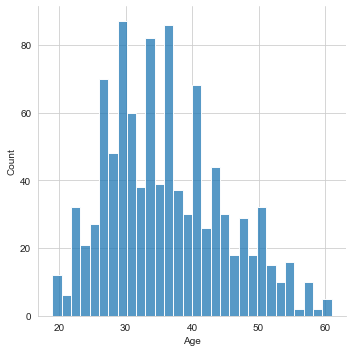

In [5]:
plt.figure(figsize=(3,5))
sns.displot(advertising['Age'],bins=30)

<AxesSubplot:ylabel='Frequency'>

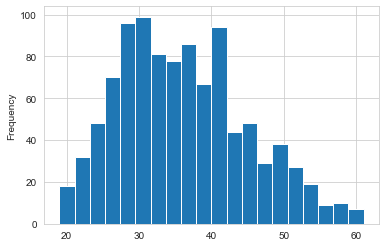

In [6]:
advertising['Age'].plot.hist(bins=20)

<div style="direction:rtl">
جوینت پلات درآمد بر حسب سن را رسم می کنیم.

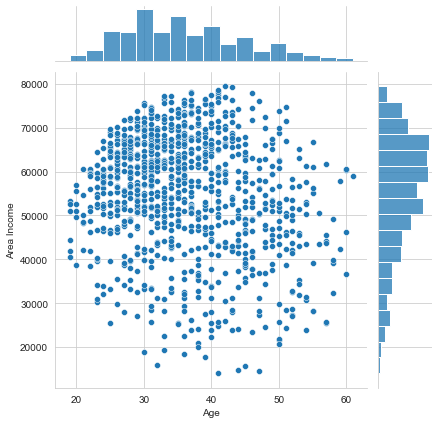

In [7]:
sns.jointplot(x='Age',y='Area Income',data=advertising)

<div style="direction:rtl">
KDE پلات میزان وقت گذاشته شده روی سایت تبلیغ بر حسب سن را رسم می کنیم.

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

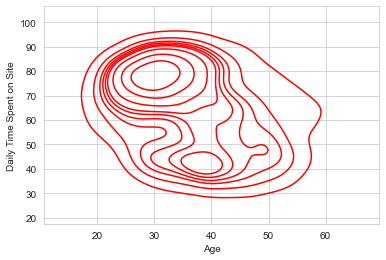

In [8]:
sns.kdeplot(x='Age',y='Daily Time Spent on Site',data=advertising, palette='rocket',color='Red')

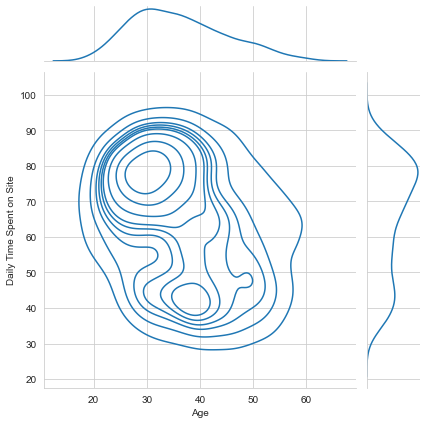

In [6]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=advertising,kind='kde')

<div style="direction:rtl">
جوینت پلات میزان استفاده از اینترنت بر حسب میزان وقت گذاشته شده روی سایت تبلیغ را رسم می کنیم.

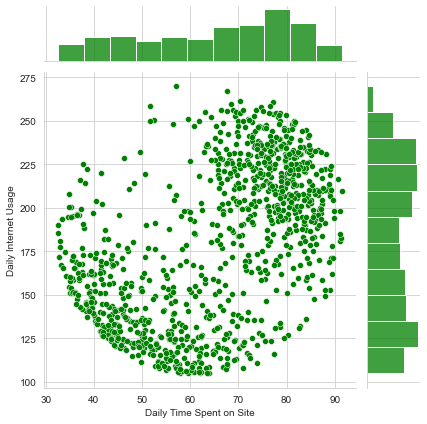

In [29]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=advertising, color='Green')

<div style="direction:rtl">
در نهایت یک Pain Plot کلی برای دیتاست، با مشخص کردن تفاوت کسانی که روی تبلیغ کلیک کرده اند و نکرده اند را رسم کنید.

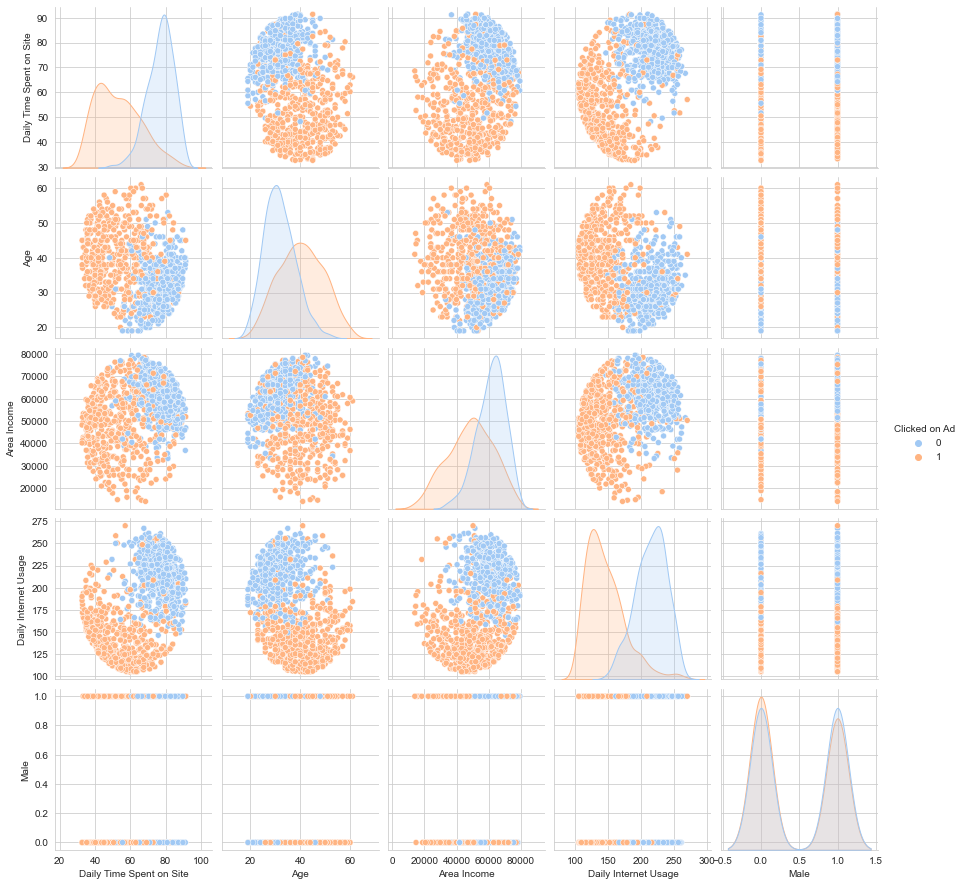

In [35]:
sns.pairplot(hue='Clicked on Ad',data=advertising,palette='pastel')

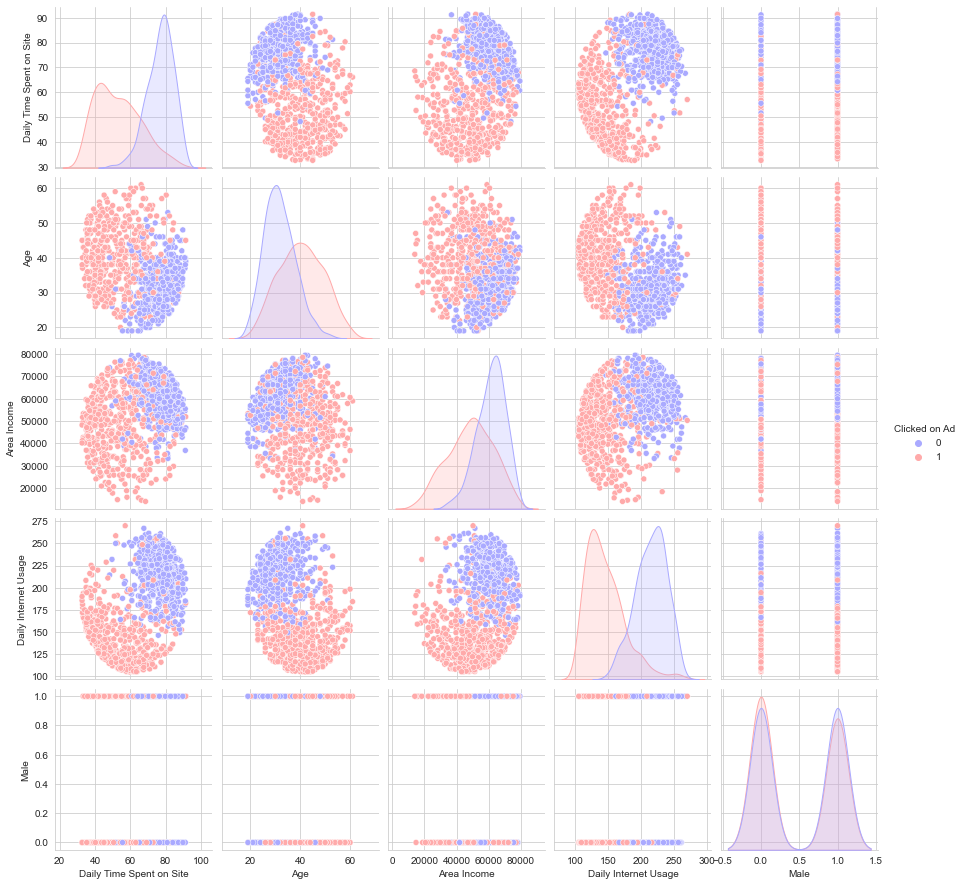

In [7]:
sns.pairplot(hue='Clicked on Ad',data=advertising,palette='bwr')

<div style="direction:rtl">
سعی کنید نتایج بالا را در چند خط تحلیل کنید :

<div style="direction:rtl">
تحلیل :افراد هرچه میزان مصرف اینترنت بالاتری داشته اند، کلیک آنها بر روی یک تبلیغ کمتر بوده است و بالاعکس.و هرچه درآمد افراد کمتر بوده است میزان کلیک آنها بر روی یک تبلیغ بیشتر بوده است. همچنین با افزایش سن افراد احتمال کلیک آنها بر روی یک تبلیغ افزایش یافته.و نکته بسیااار جالب اینکه میزان استفاده افراد از اینترنت ربط فاحشی به سن آنها ندارد.

# Logistic Regression

<div style="direction:rtl">
پس از ایمپورت متد مربوطه، داده ها را به دو بخش فیچر و لیبل تقسیم کنید و سپس آن ها را به دو بخش ترین و تست تقسیم نمایید.

In [9]:
advertising.drop(['Ad Topic Line','City','Country','Timestamp'], axis=1,inplace=True)

In [10]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [11]:
X= advertising.drop('Clicked on Ad', axis=1)

In [12]:
Y= advertising['Clicked on Ad']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=101)

<div style="direction:rtl">
حالا کلاس رگرسیون لاجستیک را بارگزاری نمایید و یک مدل از آن نوع بسازید و با داده های ترین آموزش دهید.

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
logmodel= LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

## Predictions and Evaluations

<div style="direction:rtl">
حالا به کمک مدلی که آموزش داده اید، برای داده های تست پیش بینی کنید که کدام یک روی تبلیغ ها کلیک می کنند.

In [16]:
prediction= logmodel.predict(X_test)

<div style="direction:rtl">
حالا برای مدلی که آموزش داده اید، معیار های ارزیابی همچون Score و Confusion Matrix و Classification Report را بررسی کنید.

In [17]:
print(logmodel.score(X_test,Y_test))

0.9266666666666666


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
print(confusion_matrix(Y_test,prediction))

[[149   8]
 [ 14 129]]


In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [24]:
logmodel.predict(np.array([50.00,36,60000.00,200.00,1]).reshape(1,-1))

array([1], dtype=int64)

<div style="direction:rtl">
    
## سلام پیش گوی اعظم :)
<div style="direction:rtl">    
    
#### حالا دیگه می تونی این مدلو برداری ببری به شرکتا بفروشی تا از قبل از نمایش یه تبلیغ به یه کاربر بتونن پیش بینی کنن روش کلیک می کنه یا نه و خب اگه قراره نکنه نشونش  ندن و با یه تبلیغ دیگه جایگزین کنن.